**Dataset Collection**

In [64]:
!pip install ucimlrepo

In [65]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = pd.DataFrame(iris.data.features)
y = pd.DataFrame(iris.data.targets)
df = pd.concat([X,y],axis=1)

# metadata
print(iris.metadata)

# variable information
print(iris.variables)
X.head()


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [66]:
df.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [67]:
len(X)

150

**Data** **Visualisation**

In [68]:
import plotly.express as px

fig1 = px.histogram(df, x="class", color="sepal length")
fig1.show()

In [69]:
import plotly.express as px

fig1 = px.histogram(df, x="class", color="sepal width")
fig1.show()

In [70]:
import plotly.express as px

fig1 = px.histogram(df, x="class", color="petal length")
fig1.show()

In [71]:
import plotly.express as px

fig1 = px.histogram(df, x="class", color="petal width")
fig1.show()

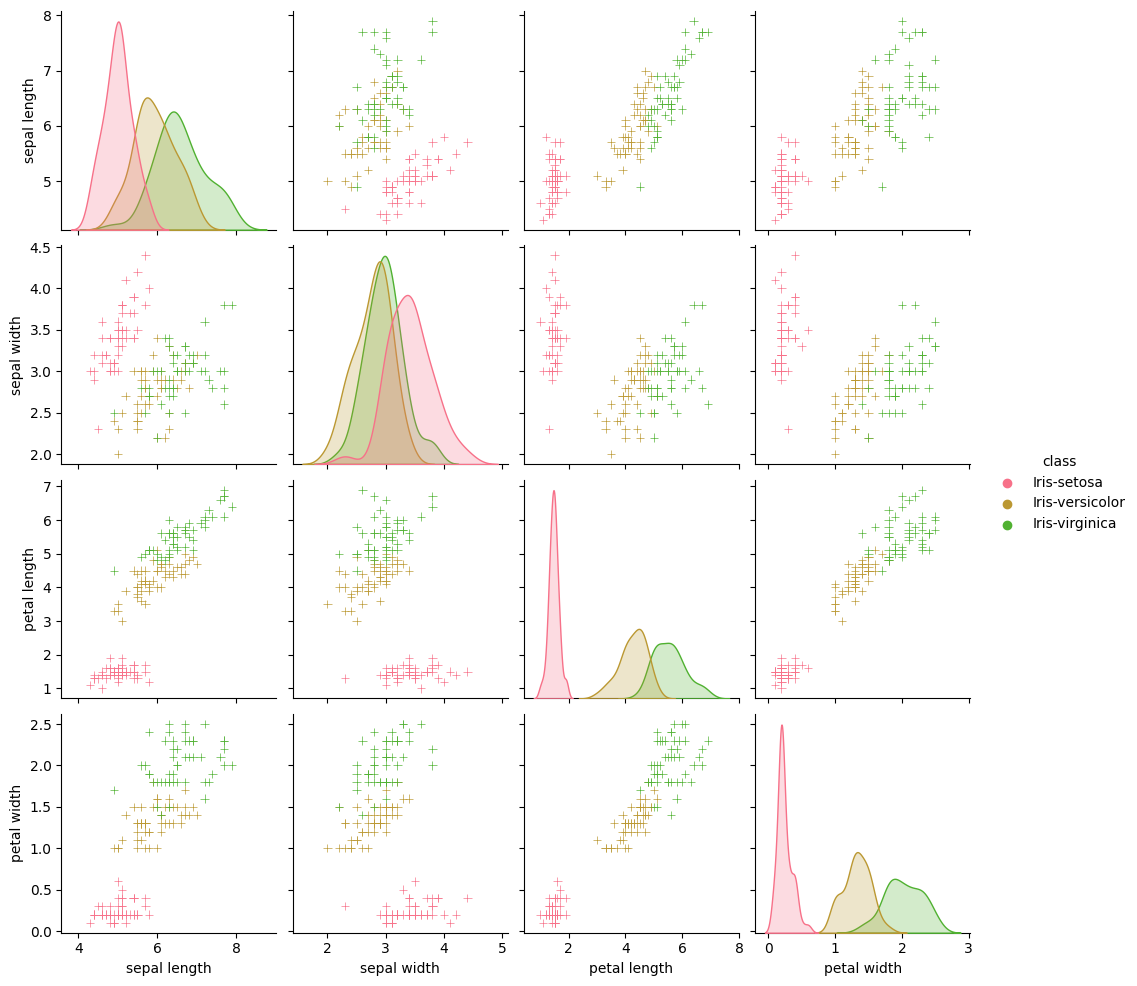

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_palette('husl')

g = sns.pairplot(df,hue='class', markers='+')
plt.show()

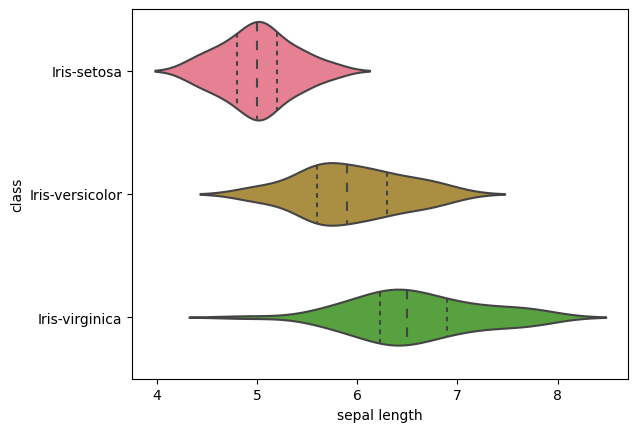

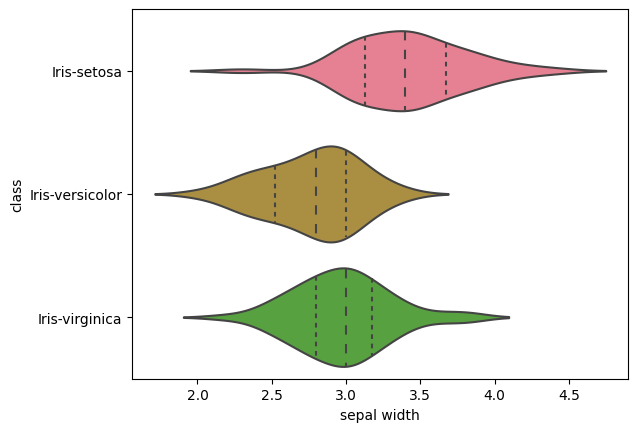

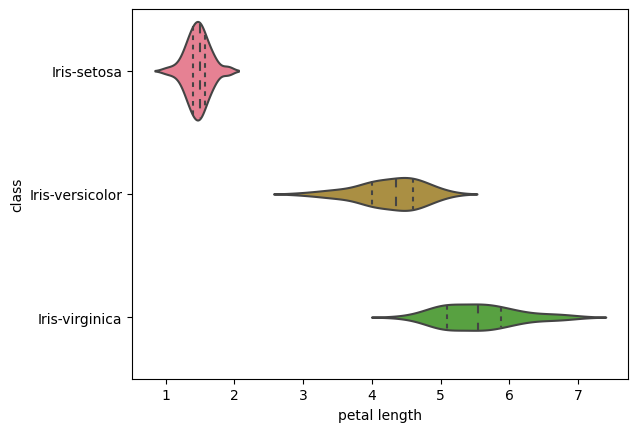

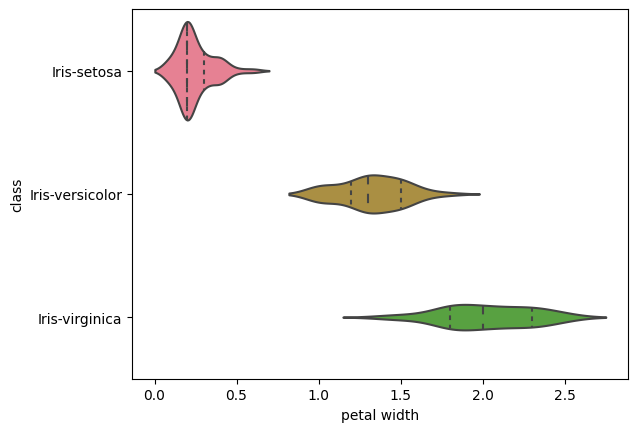

In [73]:
g = sns.violinplot(y='class', x='sepal length', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='class', x='sepal width', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='class', x='petal length', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='class', x='petal width', data=df, inner='quartile')
plt.show()

**Model Prediction on the same dataset**

In [74]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/skle

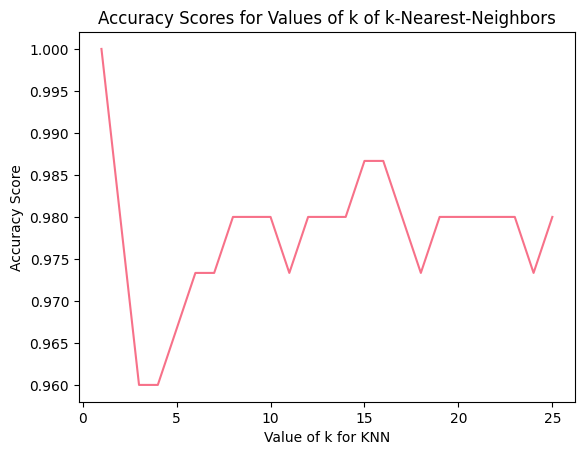

In [75]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [76]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9733333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



**train-test-split
on different models**

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90, 1)
(60, 4)
(60, 1)


**knn**

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/skle

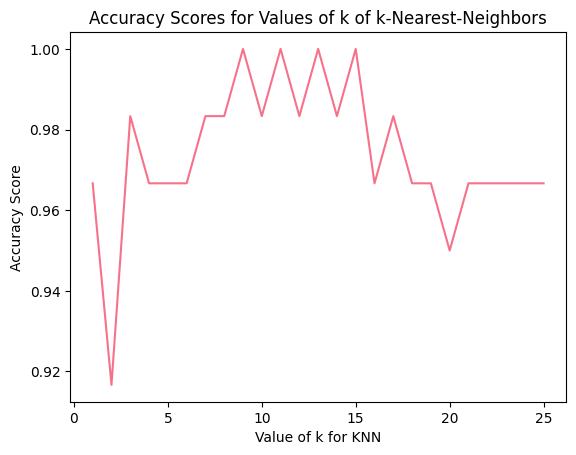

In [78]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [79]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X, y)
y_pred = knn.predict(X_test)
acc_knn = metrics.accuracy_score(y_test,y_pred)*100
print(acc_knn)
#prediction for an example of an out-of-sample observation
knn.predict([[6, 3, 4, 2]])

100.0


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



array(['Iris-versicolor'], dtype=object)

**Logistic Regression**

In [80]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_lgr = metrics.accuracy_score(y_test, y_pred)*100
print(acc_lgr)
logreg.predict([[6,3,4,2]])

98.33333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



array(['Iris-versicolor'], dtype=object)

**RandomForestClassifier**

In [81]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train.values.ravel())
acc_rfc=model.score(X_test,y_test)*100
print("Accuracy (Random Forest Classifier): ",acc_score)
model.predict([[6,3,4,2]])

Accuracy (Random Forest Classifier):  95.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array(['Iris-virginica'], dtype=object)

**Decision Tree Classifier**

In [82]:
from sklearn.tree import DecisionTreeClassifier
model4=DecisionTreeClassifier()
model4.fit(X_train,y_train)
acc_dct=model4.score(X_test,y_test)*100
print("Accuracy (Decision Tree): ",acc_dct)

Accuracy (Decision Tree):  93.33333333333333


**Accuracy Visualisation**

<Axes: xlabel='Accuracy', ylabel='Models'>

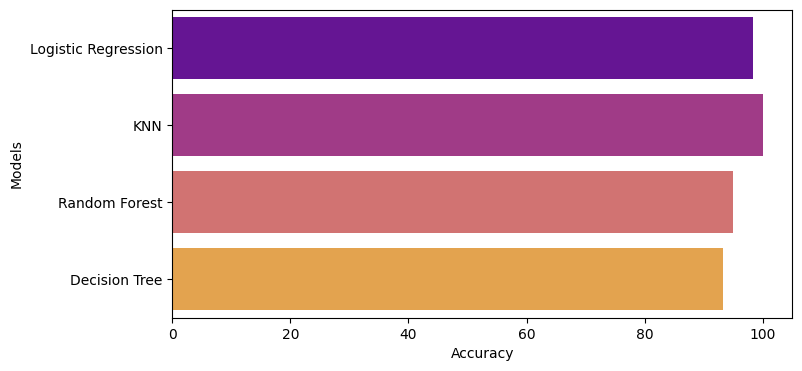

In [83]:
plt.figure(figsize=(8,4))
model_acc = [acc_lgr,acc_knn,acc_rfc,acc_dct]
model_name = ['Logistic Regression','KNN','Random Forest','Decision Tree']
plt.xlabel("Accuracy")
plt.ylabel("Models")
sns.barplot(x=model_acc, y=model_name, palette='plasma')

**Conclusion:**
**knn** and **Logisitc Regression** performed the best predicition on the test dataset.